In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [2]:
#TODO: Use another file than the preprocessed.pkl
with open('preprocessed.pkl', 'rb') as f:
    data = pickle.load(f)
    print(data)
    print(len(data))
    


      has_null  wave  gender   age  age_o  d_age  d_d_age  race  race_o  \
0            0   1.0       0  21.0   27.0    6.0        2     0       2   
1            0   1.0       0  21.0   22.0    1.0        0     0       2   
2            1   1.0       0  21.0   22.0    1.0        0     0       0   
3            0   1.0       0  21.0   23.0    2.0        1     0       2   
4            0   1.0       0  21.0   24.0    3.0        1     0       3   
...        ...   ...     ...   ...    ...    ...      ...   ...     ...   
8373         1  21.0       1  25.0   26.0    1.0        0     2       3   
8374         1  21.0       1  25.0   24.0    1.0        0     2       4   
8375         1  21.0       1  25.0   29.0    4.0        2     2       3   
8376         1  21.0       1  25.0   22.0    3.0        1     2       0   
8377         1  21.0       1  25.0   22.0    3.0        1     2       0   

      samerace  ...  d_expected_num_interested_in_me  d_expected_num_matches  \
0            0  ...

#### Show correlation between self-reported scores and scores given by the opponent 

              attractive  attractive_o
attractive      1.000000      0.287271
attractive_o    0.287271      1.000000
            sincere  sinsere_o
sincere    1.000000  -0.007687
sinsere_o -0.007687   1.000000
            funny   funny_o
funny    1.000000 -0.050144
funny_o -0.050144  1.000000
            ambition  ambitous_o
ambition    1.000000    0.157387
ambitous_o  0.157387    1.000000
                intelligence  intelligence_o
intelligence        1.000000       -0.055194
intelligence_o     -0.055194        1.000000


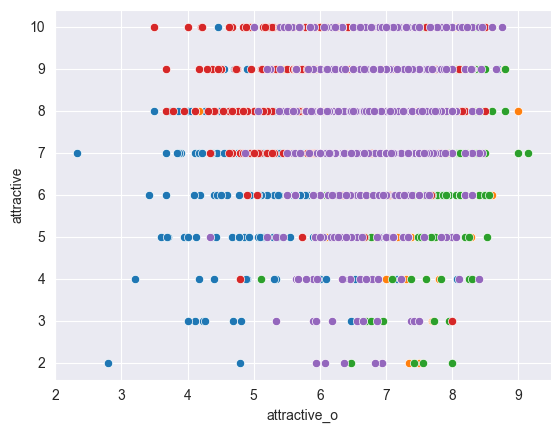

In [3]:
self_rated_features = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition']
average_columns = [ 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o']
group_by_columns = ['gender', 'age', 'race', 'field', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

def compare_ratings(data):
    combined_df = (
    data.groupby(group_by_columns, as_index=False)
    [average_columns].mean()
    )
    reduced_df = combined_df[self_rated_features + average_columns]
    
    corr_attractive = reduced_df[['attractive', 'attractive_o']].corr()
    corr_sincere = reduced_df[['sincere', 'sinsere_o']].corr()
    corr_intelligence = reduced_df[['intelligence', 'intelligence_o']].corr()
    corr_funny = reduced_df[['funny', 'funny_o']].corr()
    corr_ambition = reduced_df[['ambition', 'ambitous_o']].corr()
    
    print(corr_attractive)
    print(corr_sincere)
    print(corr_funny)
    print(corr_ambition)
    print(corr_intelligence)
    
    sns.scatterplot(reduced_df, x="attractive_o", y="attractive")
    sns.scatterplot(reduced_df, x="sinsere_o", y="sincere")
    sns.scatterplot(reduced_df, x="intelligence_o", y="intelligence")
    sns.scatterplot(reduced_df, x="funny_o", y="funny")
    sns.scatterplot(reduced_df, x="ambitous_o", y="ambition")  
   
    
compare_ratings(data)     
    

In [4]:
def remove_relational_data(data):
    data = data[['gender', 'age', 'race', 'field', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'shared_interests_o']]
    return data

data = remove_relational_data(data)    

In [5]:
combined_df = (
    data.groupby(group_by_columns, as_index=False)
    [average_columns].mean()
)

In [6]:
# Select women
combined_df = combined_df.loc[combined_df['gender'] == 0]

# Select men
#combined_df = combined_df.loc[combined_df['gender'] == 1]

##### Normalize features

In [7]:
#Remove categorical values
features = combined_df.drop(labels=['race', 'field'], axis=1)

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

##### Apply PCA

In [21]:
n_reduced_features = []
for n in range(2,10):
    pca = PCA(n_components=n)
    reduced_features = pca.fit_transform(normalized_features)
    n_reduced_features.append(reduced_features)
    print('Cumulative variance explained by {} principal components: {:.2%}'.format(n, np.sum(pca.explained_variance_ratio_)))


Cumulative variance explained by 2 principal components: 20.30%


             gender       age  attractive_important  sincere_important  \
PC_1  6.575218e-18  0.020940              0.074340           0.056538   
PC_2  7.897444e-18  0.140354              0.113763           0.133769   

      intellicence_important  funny_important  ambtition_important  \
PC_1                0.008785         0.013990             0.070582   
PC_2                0.027192         0.092816             0.076010   

      shared_interests_important  attractive   sincere  ...    movies  \
PC_1                    0.004172    0.030944  0.176845  ...  0.300686   
PC_2                    0.219245    0.125870  0.073030  ...  0.023172   

      concerts     music  shopping      yoga  attractive_o  sinsere_o  \
PC_1  0.331454  0.293219  0.156095  0.200689      0.050415   0.042427   
PC_2  0.036856  0.006076  0.155304  0.102403      0.438411   0.234870   

      intelligence_o   funny_o  ambitous_o  
PC_1        0.116

### K-means - Partitional Clustering Techniques

#### Generalized fitting and tuning function

In [52]:
def tune_model(parameter_grid, model, data, show_silhouette, show_inertia_distortion):
    if show_inertia_distortion:
        distortions = []
        inertias = []
        
        mapping1=  {}  
        mapping2=  {}    

    best_score = -1        
    silhouette_scores = []
    
    # evaluation based on silhouette_score
    for p in parameter_grid:
        model.set_params(**p)    # Set current hyperparameters
        model.fit(data) 
        
        if len(set(model.labels_)) > 2:
            ss = silhouette_score(data, model.labels_)   
            silhouette_scores += [ss]     
            if show_silhouette:
                print('Parameter:', p, 'Score', ss)
            
            if show_inertia_distortion:
                distortions.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)**2) / data.shape[0])      
                inertias.append(model.inertia_)
            
                k = p['n_clusters']
                # Store the mappings for easy access
                mapping1[k] = distortions[-1]
                mapping2[k] = inertias[-1]
                # check p which has the best score
            
            if ss > best_score:
                best_score = ss
                best_grid = p
        
    if show_silhouette:      
        # plotting silhouette score
        plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
        plt.xticks(range(len(silhouette_scores)), range(len(list(silhouette_scores))))
        plt.title('Silhouette Score', fontweight='bold')
        plt.xlabel('Number of Clusters')
        plt.show()
    
    if show_inertia_distortion:
        print("Distortion values:")
        for key, val in mapping1.items():
            print(f'{key} : {val}')
        # Plotting the graph of k versus Distortion
        plt.plot(parameters, distortions, 'bx-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method using Distortion')
        plt.grid()
        plt.show()
        
        print("Inertia values:")
        for key, val in mapping2.items():
            print(f'{key} : {val}')
        # Plotting the graph of k versus Inertia
        plt.plot(parameters, inertias, 'bx-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.title('The Elbow Method using Inertia')
        plt.grid()
        plt.show()   

In [35]:
model = KMeans()
parameters = range(2,15)
parameter_grid = ParameterGrid({'n_clusters': parameters, 'n_init': ['auto']})

tune_model(parameter_grid, model, combined_df, False, False)
tune_model(parameter_grid, model, normalized_features, False, False)
for rf in n_reduced_features:
    tune_model(parameter_grid, model, rf, False, False)

### Hierarchical Clustering

Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 2} Score 0.5217086784289099
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 5} Score 0.3226337668062598
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 10} Score 0.2081809060076844
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 2} Score 0.5499182744010861
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 5} Score 0.3715882795179652
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 10} Score 0.2652484383806478
Parameter: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 2} Score 0.5489419946368929
Parameter: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 5} Score 0.3640315199356548
Parameter: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 10} Score 0.31763411850428386


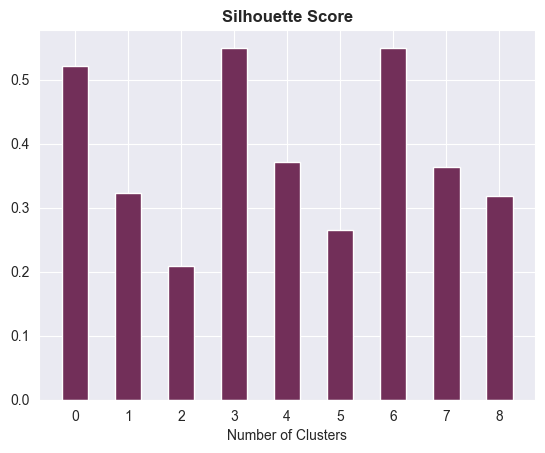

Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 2} Score 0.07375096693269945
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 5} Score 0.027500994952867557
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 10} Score 0.021357617746684696
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 2} Score 0.01615157505685529
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 5} Score 0.019731456046084114
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 10} Score 0.019089240845608476
Parameter: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 2} Score 0.36567644584960246
Parameter: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 5} Score 0.2440520739630121
Parameter: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 10} Score 0.11544934904376318


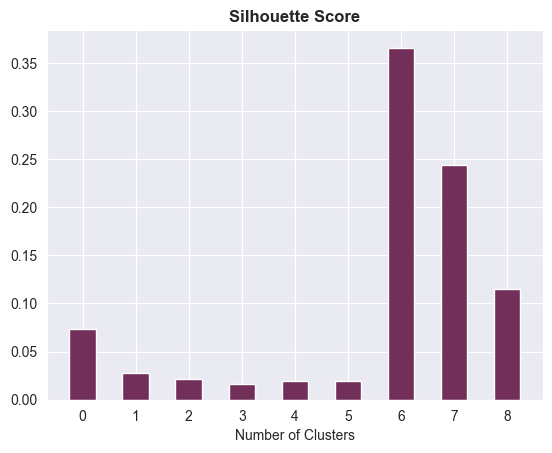

In [28]:
parameters = [2, 5, 10]
parameter_grid = ParameterGrid({'n_clusters': parameters, 'metric': ['euclidean'], 'linkage':['ward', 'complete', 'average']})
agglom = AgglomerativeClustering() 

tune_model(parameter_grid, agglom, combined_df, True, False)
tune_model(parameter_grid, agglom, normalized_features, True, False)


### DBSCAN

Parameter: {'eps': 10, 'min_samples': 2} Score -0.5318407929090622
Parameter: {'eps': 20, 'min_samples': 2} Score -0.3523182893008445
Parameter: {'eps': 20, 'min_samples': 10} Score 0.07334160353243402


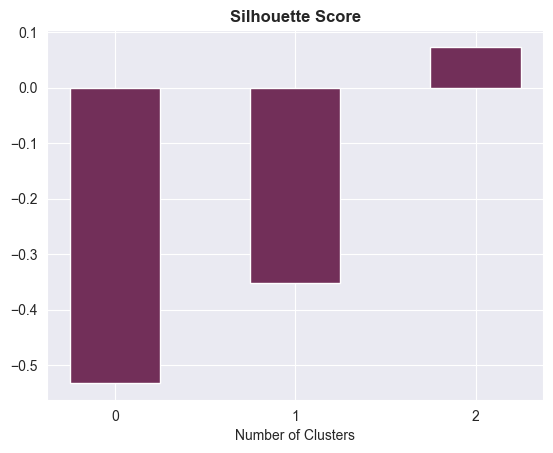

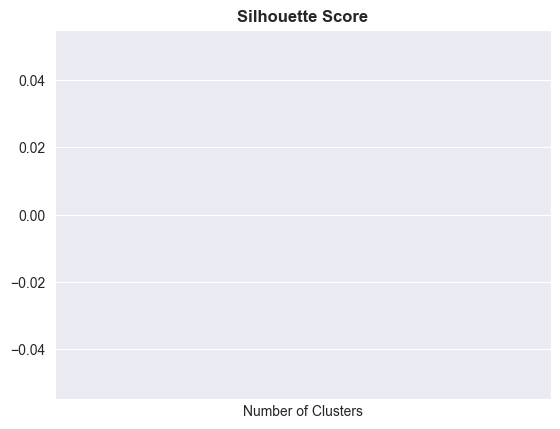

In [53]:
dbscan = DBSCAN()
eps = [0.01, 0.2, 0.5, 0.9, 1, 10, 20, 100]
min_samples = [2, 5, 10]

parameter_grid = ParameterGrid({'eps':eps, 'min_samples':min_samples})

tune_model(parameter_grid, dbscan, combined_df, True, False)
tune_model(parameter_grid, dbscan, normalized_features, True, False)

